Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [29]:
from google.colab import files
upload=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla (1).csv


In [30]:
import pandas as pd
df1=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
list(df1)
df= df1[[ "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight","Price"]]
df


,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


#Step-2: EDA

In [31]:
df.isnull().sum()
#No null values

Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
Price            0
dtype: int64

In [32]:
df.corr().round(3)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000,0.506,-0.157,-0.098,-0.148,-0.005,-0.198,-0.470,-0.877
KM,0.506,1.000,-0.334,0.103,-0.036,0.015,0.278,-0.029,-0.570
HP,-0.157,-0.334,1.000,0.036,0.092,0.209,-0.298,0.090,0.315
cc,-0.098,0.103,0.036,1.000,0.080,0.015,0.307,0.336,0.126
Doors,-0.148,-0.036,0.092,0.080,1.000,-0.160,0.109,0.303,0.185
Gears,-0.005,0.015,0.209,0.015,-0.160,1.000,-0.005,0.021,0.063
Quarterly_Tax,-0.198,0.278,-0.298,0.307,0.109,-0.005,1.000,0.626,0.219
Weight,-0.470,-0.029,0.090,0.336,0.303,0.021,0.626,1.000,0.581
Price,-0.877,-0.570,0.315,0.126,0.185,0.063,0.219,0.581,1.000


In [33]:
# Select the columns
selected_columns = df[[ "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]]

# Calculate IQR for each column
Q1 = selected_columns.quantile(0.25)
Q3 = selected_columns.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Find outliers
outliers = ((selected_columns < (Q1 - threshold * IQR)) | (selected_columns > (Q3 + threshold * IQR))).any(axis=1)
outliers_df = df[outliers]
outliers_df

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1388,75,52000,110,1600,5,5,19,1075,8750
1416,79,40093,110,1600,5,5,19,1114,8950
1423,80,35821,86,1300,3,5,19,1015,7950
1426,78,30964,110,1600,3,4,85,1080,9950


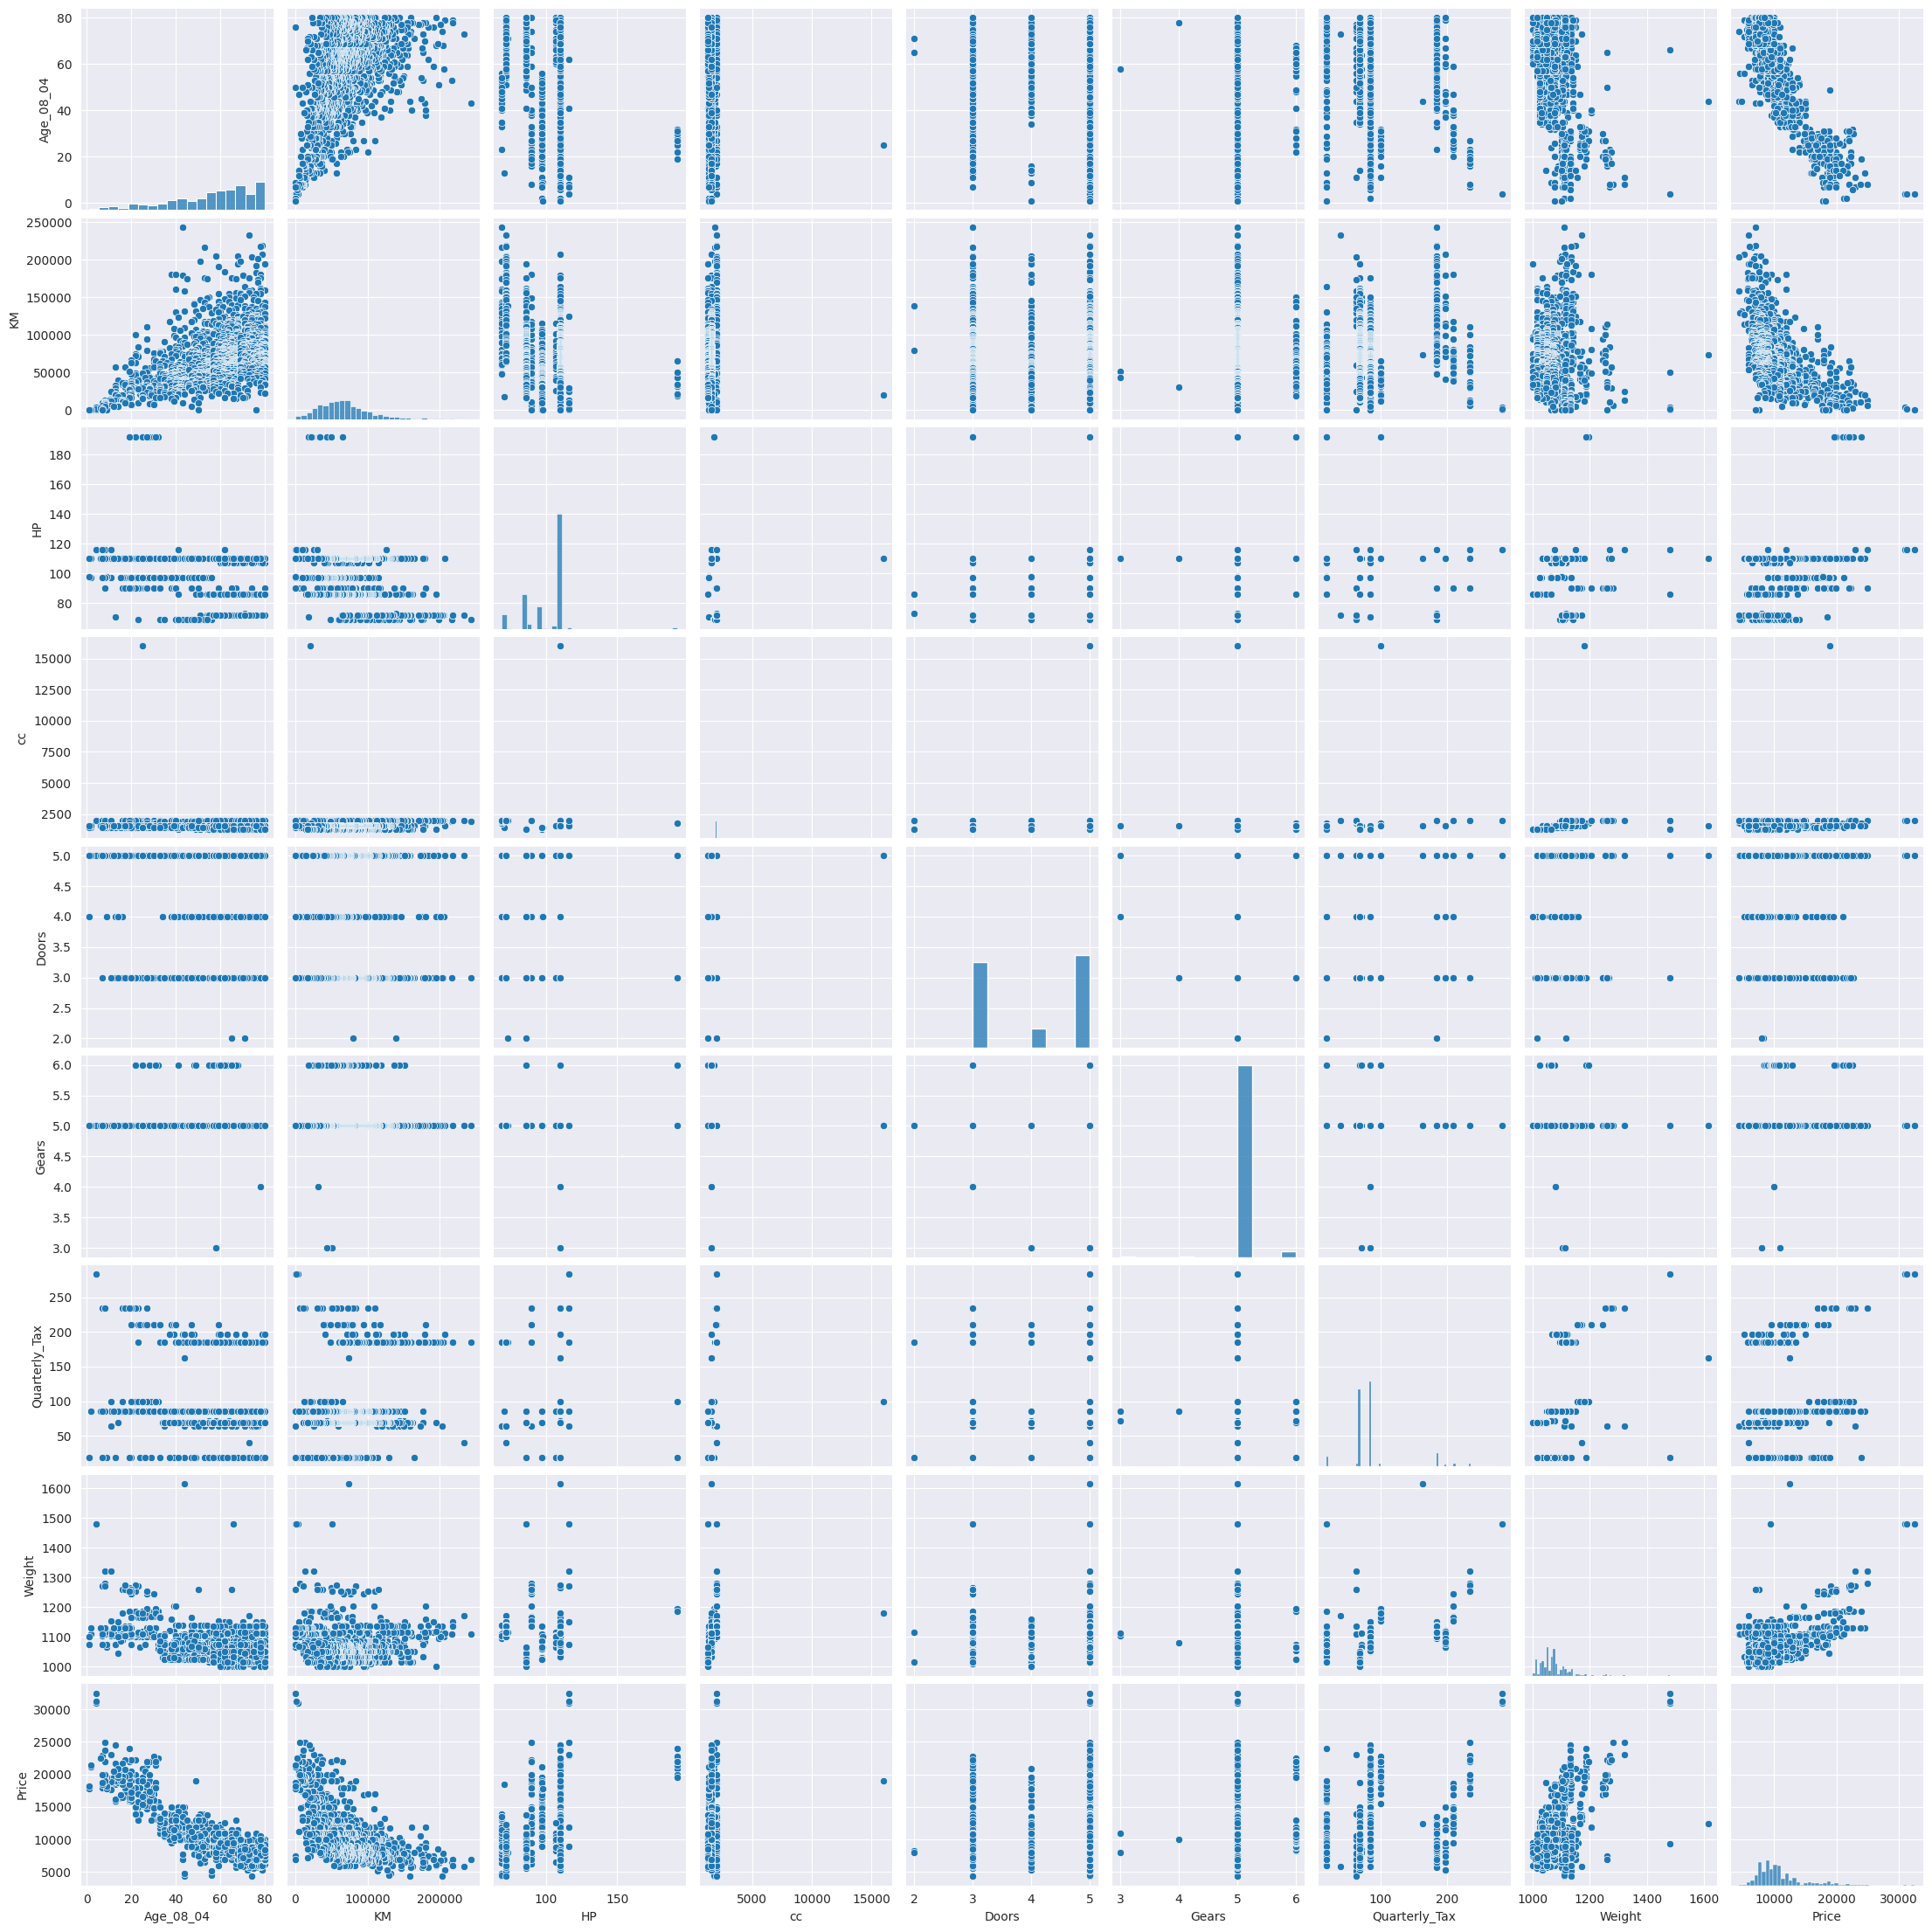

In [34]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df)

#Step-3: Data Transformation



In [35]:
X=df.iloc[:,0:8]
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
X = pd.DataFrame(SS_X)
Y=df['Price']

#Step-4: Data Splitting

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75,random_state=1471)
X_train.shape, X_test.shape
X_train, X_test

(             0         1         2         3         4         5         6  \
 894   0.164193 -0.208710 -1.035138 -0.652594  1.014941 -0.140425 -0.440785   
 439  -0.373629  0.243103  0.567440  0.054555 -0.035099 -0.140425 -0.440785   
 144  -2.202224 -1.287247  0.567440  0.054555  1.014941 -0.140425 -0.051626   
 855   0.325540 -0.095144 -1.035138 -0.652594 -1.085139 -0.140425 -0.440785   
 1330  0.809579 -0.093677 -1.969976  0.997419 -1.085139 -0.140425  2.380619   
 ...        ...       ...       ...       ...       ...       ...       ...   
 559  -0.319847 -0.768863  0.567440  0.054555  1.014941 -0.140425 -0.051626   
 751   0.056629  0.318369  0.567440  0.054555  1.014941 -0.140425 -0.051626   
 491  -0.104718 -0.221219  0.567440  0.054555  1.014941 -0.140425 -0.051626   
 327  -1.234144 -0.931958  0.567440  0.054555  1.014941 -0.140425 -0.051626   
 36   -1.664402 -1.161092 -0.300623 -0.416878 -1.085139 -0.140425 -0.051626   
 
              7  
 894  -0.521820  
 439  -0.80686

#Step-5: Model Fitting

In [37]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)
LR.intercept_, LR.coef_

(10724.302884433631,
 array([-2259.1012845 ,  -751.30246946,   493.01614893,   -29.44919905,
          -23.49976773,   110.2387644 ,   144.33806003,   877.94110702]))

#Step-6: Metrics

In [38]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#TRAINING AND TESTING ERRORS
Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)
error1= np.sqrt(mean_squared_error(Y_train,Y_pred_train))
print("Training Error:", error1.round(3))
error2= np.sqrt(mean_squared_error(Y_test,Y_pred_test))
print("Test Error:", error2.round(3))

#MODEL ERROR
#print(X)
Y_pred = LR.predict(X)
mse=mean_squared_error(Y,Y_pred)
print('Error on entire Data: ', np.sqrt(mse))

r2 = r2_score(Y,Y_pred)
print("r2_score",r2.round(3))

Training Error: 1342.936
Test Error: 1328.026
Error on entire Data:  1339.223932842049


# New models: Checking Multi-collinearity

In [39]:
df.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.314990
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.185326
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,0.063104
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.219197
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,1.000000


From Correlation: Weight,Age_08_04, KM are strongly related to price;
HP, cc, Quarterly_Tax are weakly related to price;
Gears is unrelated to price.

Highly correlated pairs:


1.   (Age, KM)
2.   (Quarlterly_Tax, Weight)



In [46]:
X.columns=["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
X

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
1,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
2,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
3,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
4,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883
1432,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1433,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1434,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915


In [55]:
#X1 =X[[ "Age_08_04", "Quarterly_Tax"]]
#X1=X[[ "Age_08_04", "Weight"]]
#X1 =X[[ "KM", "Quarterly_Tax"]]
#X1=X[[ "KM", "Weight"]]
#X1 = X[['Age_08_04',  'Weight','HP', 'cc', 'Doors', 'Gears']]
X1=X
Y=  df['Price']
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
print("VIF for Model-1:")
print(vif)

VIF for Model-1:
[1.8846198056602868, 1.7569047782042877, 1.4194221086310985, 1.163893984942381, 1.1565752070760429, 1.0987230193470372, 2.3114308115310394, 2.516419837445867]


No multi-collinearity issues in all the models

Choosing all the 8 variables for the model

In [56]:
#Model
#splitting
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y,train_size=0.75,random_state=1471)

#model fitting
LR1 = LinearRegression()
LR1.fit(X_train,Y_train)

#rmse,r2,vif
Y_pred = LR1.predict(X1)
mse=mean_squared_error(Y,Y_pred)
r2=r2_score(Y,Y_pred)
print(np.sqrt(mse),r2)

1339.223932842049 0.8635660940778658


# Data Cleaning #1

Outliers are removed

In [57]:
# Remove outliers from the original DataFrame
df_cleaned = df[~outliers]

# df_cleaned now contains the data without outliers
df_cleaned

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
17,24,21716,110,1600,3,5,85,1105,17950
19,30,64359,110,1600,3,5,85,1105,16950
20,30,67660,110,1600,3,5,85,1105,15950
22,28,56349,110,1600,3,5,85,1120,15950
23,28,32220,110,1600,3,5,85,1120,16950
...,...,...,...,...,...,...,...,...,...
1430,80,23000,86,1300,3,5,69,1015,8450
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500


In [60]:
X=df_cleaned.iloc[:,0:8]
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
X = pd.DataFrame(SS_X)
Y=df_cleaned['Price']

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75,random_state=1471)

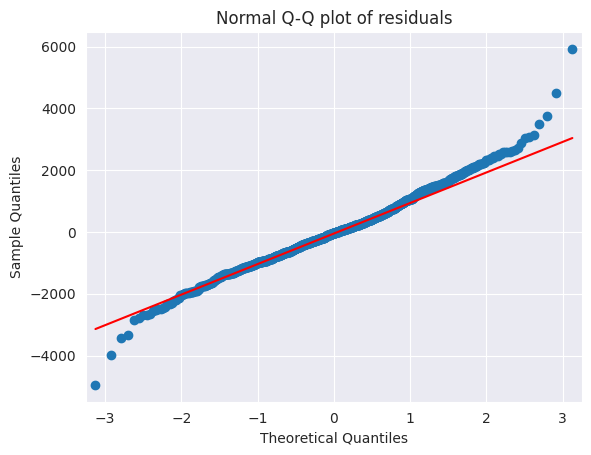

In [69]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_cleaned).fit()

import matplotlib.pyplot as plt

QQ_plot = sm.qqplot(model.resid,line="q") # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [70]:
from scipy import stats

# Assuming 'residuals' is the variable containing your residuals
stat, p = stats.shapiro(model.resid)

# stat is the test statistic, and p is the p-value

# Check the p-value
alpha = 0.05  # Set your significance level
if p > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

The data does not appear to be normally distributed (reject H0)


In [71]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([], dtype=int64)]

In [72]:
list(np.where(model.resid<-6000))

[array([], dtype=int64)]

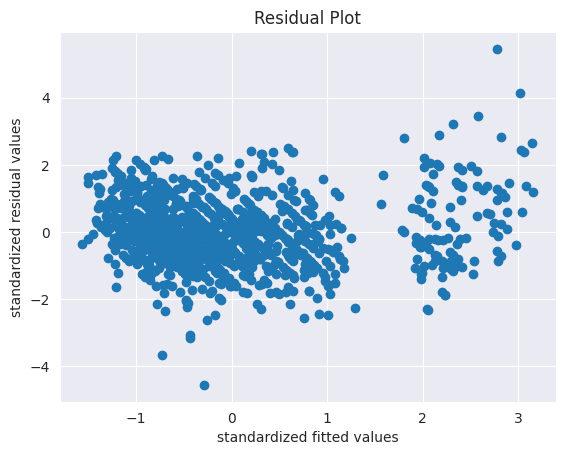

In [76]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

Homoscedastic as there is no clear relation

In [78]:
#  Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c.round(3)

array([0.002, 0.003, 0.001, ..., 0.005, 0.   , 0.002])

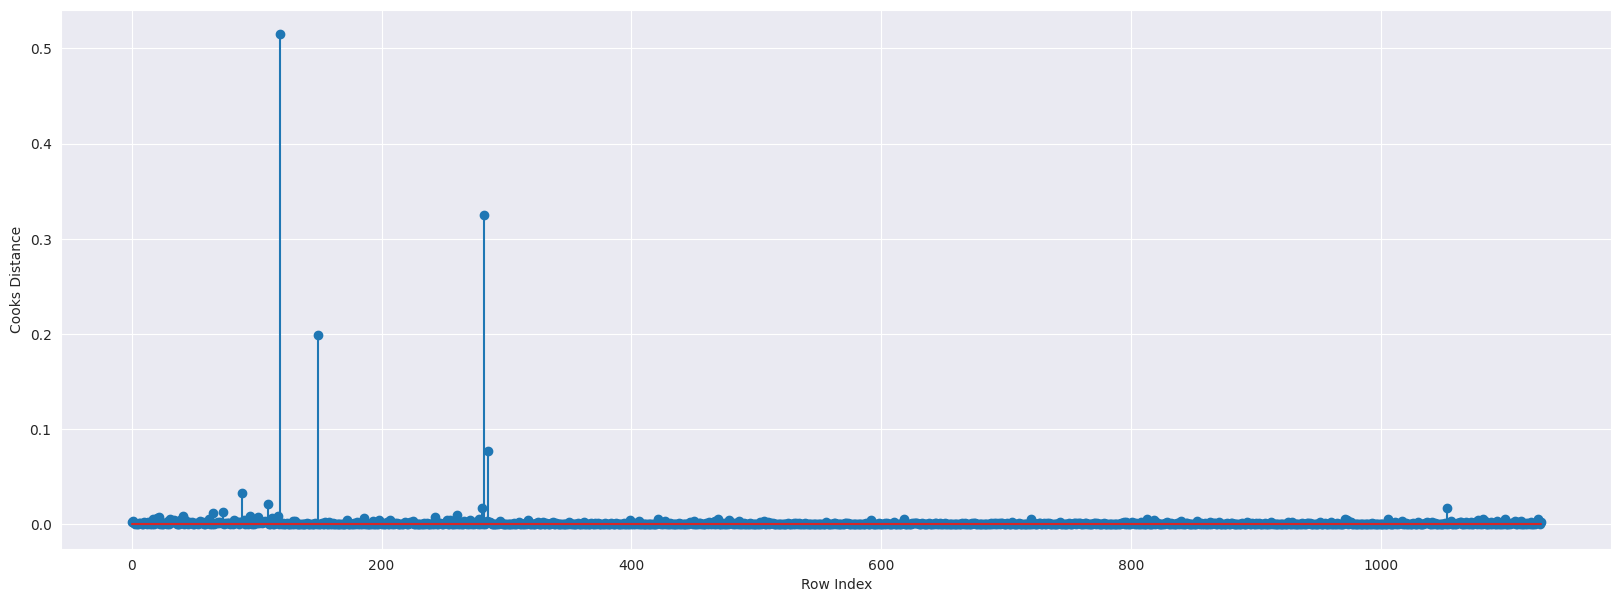

In [79]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df_cleaned)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [80]:
np.argmax(c) , np.max(c)

(119, 0.5151174802631829)

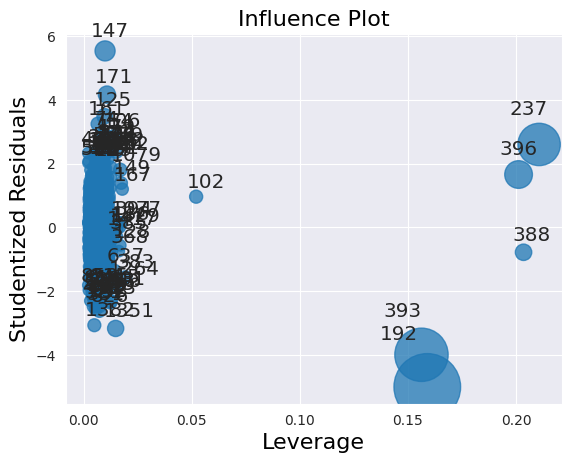

In [82]:
#Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
# High Influence points

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [83]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df_cleaned.shape[1]
n=df_cleaned.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.026572187776793623

In [86]:
df_new=df_cleaned.drop(df_cleaned.index[[119]],axis=0).reset_index(drop=True)
df_new

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,24,21716,110,1600,3,5,85,1105,17950
1,30,64359,110,1600,3,5,85,1105,16950
2,30,67660,110,1600,3,5,85,1105,15950
3,28,56349,110,1600,3,5,85,1120,15950
4,28,32220,110,1600,3,5,85,1120,16950
...,...,...,...,...,...,...,...,...,...
1123,80,23000,86,1300,3,5,69,1015,8450
1124,69,20544,86,1300,3,5,69,1025,7500
1125,72,19000,86,1300,3,5,69,1015,10845
1126,71,17016,86,1300,3,5,69,1015,8500


Model deletion diagnostics

In [88]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_new).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df_new=df_new.drop(df_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df_new
else:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_new).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.882679455236667


In [89]:
X=df_new.iloc[:,0:8]
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
X = pd.DataFrame(SS_X)
Y=df_new['Price']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75,random_state=1471)
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)
LR.intercept_, LR.coef_
Y_pred = LR.predict(X)
print("Final model RMSE and R2 are: ")

mse=mean_squared_error(Y,Y_pred)
print('Error on entire Data: ', np.sqrt(mse))

r2 = r2_score(Y,Y_pred)
print("r2_score",r2.round(3))

Final model RMSE and R2 are: 
Error on entire Data:  1056.4398416553097
r2_score 0.882
